In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 119s 1us/step


In [4]:
len(x_train),len(x_test)

(50000, 10000)

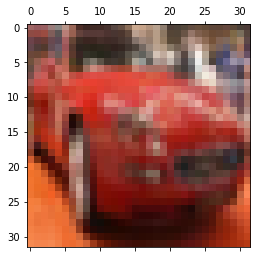

In [8]:
plt.matshow(x_train[5])

In [6]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [11]:
X_train = x_train / 255
X_test = x_test / 255

In [15]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9153 - accuracy: 0.3147
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7686 - accuracy: 0.3723
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7072 - accuracy: 0.3952
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6673 - accuracy: 0.4091
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6471 - accuracy: 0.4136
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6277 - accuracy: 0.4206
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6105 - accuracy: 0.4282
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5918 - accuracy: 0.4360
Epoch 9/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5839 - accuracy: 0.4361
Epoch 10/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5

In [18]:
model.evaluate(X_test,y_test)

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[554,  59,  37,  11,  27,  17,  35,  27, 185,  48],
       [ 39, 672,  11,   5,  15,  13,  28,  17,  88, 112],
       [134,  61, 160,  25, 204,  57, 221,  79,  41,  18],
       [ 45,  58,  56, 163, 104, 142, 244,  70,  60,  58],
       [ 74,  31,  63,  34, 422,  27, 205,  83,  42,  19],
       [ 52,  55,  53,  94, 115, 284, 168,  89,  55,  35],
       [ 16,  32,  24,  32, 138,  45, 638,  33,  22,  20],
       [ 97,  56,  28,  42, 110,  54,  59, 444,  32,  78],
       [102,  86,  17,   5,  17,  14,  20,  10, 673,  56],
       [ 61, 269,   6,  12,   8,  15,  32,  49,  84, 464]])>

Text(69.0, 0.5, 'Truth')

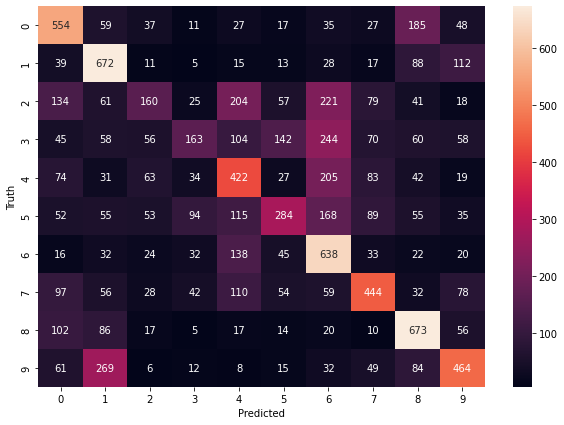

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')